In [957]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

In [958]:
def get_data2(filename):    
    data = pd.read_csv(filename) #, names=["Interval","kWh"])
    return data

In [959]:
conso_file = r"\\192.168.0.175\pihome\Documents\conso2.csv"
conso_data = get_data2(conso_file)
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113267 entries, 0 to 1113266
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Interval  1113267 non-null  int64  
 1   kWh       1113267 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 17.0 MB


In [960]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1113262    0.14
1113263    0.14
1113264    0.14
1113265    0.14
1113266    0.13
Name: kWh, Length: 1113267, dtype: float64

In [961]:
conso_data['kWh']

0          0.16
1          0.16
2          0.16
3          0.16
4          0.16
           ... 
1113262    0.14
1113263    0.14
1113264    0.14
1113265    0.14
1113266    0.13
Name: kWh, Length: 1113267, dtype: float64

In [962]:
l=len(conso_data)-1
l

1113266

In [963]:
conso_data['sec']=conso_data['Interval']/1000


In [964]:
conso_data['Wh']=3600000/conso_data['Interval']


In [965]:
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

In [966]:
conso_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1113267 entries, 0 to 1113266
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Interval   1113267 non-null  int64  
 1   kWh        1113267 non-null  float64
 2   sec        1113267 non-null  float64
 3   Wh         1113267 non-null  float64
 4   cumul(ms)  1113267 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 42.5 MB


In [967]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms)
1113262,25617,0.14,25.617,140.531678,25669855059
1113263,25799,0.14,25.799,139.540292,25669880858
1113264,26138,0.14,26.138,137.730507,25669906996
1113265,26561,0.14,26.561,135.537066,25669933557
1113266,26733,0.13,26.733,134.665021,25669960290


In [968]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)  # convert to microseconds
cumtime

25669960290000

In [969]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début

datetime.datetime(2023, 8, 21, 18, 38, 39, 647749)

In [970]:
conso_data['cumul(ms)'][conso_data['cumul(ms)'].isna()==True]

Series([], Name: cumul(ms), dtype: int64)

In [971]:
conso_data.iloc[0]


Interval     21934.00000
kWh              0.16000
sec             21.93400
Wh             164.12875
cumul(ms)    21934.00000
Name: 0, dtype: float64

In [972]:
conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]


In [973]:
conso_data['dates']

0         2023-08-21 18:39:01.581749
1         2023-08-21 18:39:23.439749
2         2023-08-21 18:39:45.440749
3         2023-08-21 18:40:07.368749
4         2023-08-21 18:40:29.259749
                     ...            
1113262   2024-06-13 21:09:34.706749
1113263   2024-06-13 21:10:00.505749
1113264   2024-06-13 21:10:26.643749
1113265   2024-06-13 21:10:53.204749
1113266   2024-06-13 21:11:19.937749
Name: dates, Length: 1113267, dtype: datetime64[ns]

In [974]:
conso_data['days']= [d.strftime('%d/%m/%y') for d in conso_data['dates']]    
#[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,21934,0.16,21.934,164.128750,21934,2023-08-21 18:39:01.581749,21/08/23
1,21858,0.16,21.858,164.699424,43792,2023-08-21 18:39:23.439749,21/08/23
2,22001,0.16,22.001,163.628926,65793,2023-08-21 18:39:45.440749,21/08/23
3,21928,0.16,21.928,164.173659,87721,2023-08-21 18:40:07.368749,21/08/23
4,21891,0.16,21.891,164.451144,109612,2023-08-21 18:40:29.259749,21/08/23
...,...,...,...,...,...,...,...
1113262,25617,0.14,25.617,140.531678,25669855059,2024-06-13 21:09:34.706749,13/06/24
1113263,25799,0.14,25.799,139.540292,25669880858,2024-06-13 21:10:00.505749,13/06/24
1113264,26138,0.14,26.138,137.730507,25669906996,2024-06-13 21:10:26.643749,13/06/24
1113265,26561,0.14,26.561,135.537066,25669933557,2024-06-13 21:10:53.204749,13/06/24


In [975]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
date = now.day
day = now.strftime('%d/%m/%y')    #str(now.month)+'-'+str(now.day)
day, date, month, year


('13/06/24', 13, 6, 2024)

In [976]:
here = now.strftime('%H:%M:%S')
here

'21:11:43'

In [977]:
conso_day = conso_data[conso_data['days']==day]
# save to file
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [978]:
conso_day.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3002 entries, 1110265 to 1113266
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   3002 non-null   int64         
 1   kWh        3002 non-null   float64       
 2   sec        3002 non-null   float64       
 3   Wh         3002 non-null   float64       
 4   cumul(ms)  3002 non-null   int64         
 5   dates      3002 non-null   datetime64[ns]
 6   days       3002 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 187.6+ KB


In [979]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
#grouped
# count elements in each group => conso in watts => convert to kW
df_grp = grouped.count()/1000


In [980]:
data = list(df_grp['kWh'])
print(data)


[0.897, 3.699, 4.22, 3.697, 4.212, 4.623, 3.484, 3.396, 3.529, 3.683, 3.842, 3.716, 4.257, 3.86, 3.418, 3.632, 3.325, 3.451, 4.238, 4.019, 4.061, 3.89, 3.467, 4.453, 3.7, 3.819, 4.417, 4.661, 3.723, 3.224, 3.172, 4.054, 3.626, 3.186, 3.791, 4.172, 3.744, 3.557, 4.819, 4.168, 4.535, 3.777, 3.377, 4.318, 3.881, 3.884, 3.427, 4.08, 3.65, 3.398, 4.11, 3.402, 3.892, 3.827, 3.649, 3.744, 4.245, 3.285, 3.885, 2.954, 2.056, 2.041, 2.483, 4.085, 3.74, 4.324, 3.639, 3.893, 3.746, 3.965, 3.929, 4.143, 3.666, 3.173, 3.756, 3.54, 3.596, 3.703, 3.686, 3.23, 3.909, 3.266, 3.748, 3.587, 4.105, 3.671, 3.26, 3.827, 4.116, 4.336, 4.09, 4.0, 4.212, 3.743, 3.932, 3.877, 3.91, 3.76, 4.026, 4.339, 3.879, 3.532, 3.668, 3.662, 3.339, 3.856, 3.985, 4.121, 3.463, 4.179, 3.606, 4.132, 4.488, 3.694, 3.409, 3.593, 4.201, 3.639, 4.081, 3.981, 3.756, 3.58, 5.147, 3.693, 3.766, 4.296, 4.084, 4.784, 4.396, 3.933, 3.814, 4.378, 4.62, 4.246, 4.776, 4.343, 3.661, 4.243, 3.684, 3.606, 3.528, 3.975, 3.632, 3.789, 3.59, 3.49

In [981]:
# save to file
import pickle
path = r'kwh_mean.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

In [982]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
def show(day,pltcolor='darkcyan',bgcolor="ivory"):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
    #=[x.hour for x in conso_day['dates']]
    df= conso_day.set_index('heure')
    here = now.strftime('%H:%M:%S')
    conso_jour=len(df['kWh'])
    here, len(df)/1000, conso_jour

    # consommation d'une journée entière à partir de minuit
    # Set background color of the outer 
    # area of the plt
    #plt.figure(facecolor=fgcolor)
    fig, ax = plt.subplots(facecolor=pltcolor)
    
    major_ticks=300;minor_ticks=100
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
    # the size of A4 paper
    fig.set_size_inches(10, 5)
    
    # set bg color
    ax.set_facecolor(bgcolor)
    plt.plot(df['kWh'])
    #plt.plot(conso_day['heure'],conso_day['kWh'])
    plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
    plt.grid()
    plt.xticks(rotation=30);


In [983]:
def conso_byhour(day):
    conso_day=conso_data[conso_data['days']==day].copy()  # no more error
    conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))

    conso_hours = conso_day.copy()
    conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
    conso_hours#.info()
    # group by hour
    groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
    groupedbyhour.count()
    len(groupedbyhour)
    x = np.arange(1,len(groupedbyhour)+1)

    #groupedbyhour.count().plot(grid=True,xticks=x)
    plt.figure(figsize=(12, 8),facecolor='darkcyan')
    values = groupedbyhour.count().kWh
    #ax = plt.bar(x,groupedbyhour.count().kWh)
    ax = values.plot(kind="bar",color='green',width=.8)
    ax.set_facecolor('antiquewhite')
    #plt.grid()
    plt.tight_layout()
    plt.title(f'Conso by hour (W) - {day}')
    plt.xlim(-1,len(x)+1)
    plt.xticks(rotation=30);
    
    rects = ax.patches

    # Make some labels.
    labels = [f"{i}" for i in values]
    
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 5, label, ha="center", va="bottom",
            fontfamily='calibri', fontsize=16, fontweight='bold', color='blue'
        )
    
    

In [984]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean

kWh    0.31305
dtype: float64

In [985]:
mean=(grouped.count()/1000).mean()
mean

kWh    3.735795
dtype: float64

In [986]:
last=df_grp.iloc[-1]['kWh']
last

3.002

In [987]:
conso_day.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3002 entries, 1110265 to 1113266
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   3002 non-null   int64         
 1   kWh        3002 non-null   float64       
 2   sec        3002 non-null   float64       
 3   Wh         3002 non-null   float64       
 4   cumul(ms)  3002 non-null   int64         
 5   dates      3002 non-null   datetime64[ns]
 6   days       3002 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 187.6+ KB


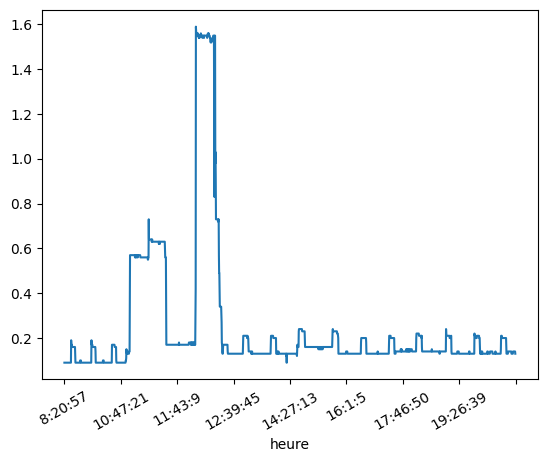

In [988]:
conso_day=conso_data[conso_data['days']==day].copy()  # no more error
conso_day['heure']=conso_day['dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
df= conso_day.set_index('heure')
df.tail(2000)['kWh'].plot()
plt.xticks(rotation=30);

In [989]:
conso_day['heure']


1110265      0:0:10
1110266      0:0:31
1110267      0:0:52
1110268      0:1:13
1110269      0:1:45
             ...   
1113262     21:9:34
1113263     21:10:0
1113264    21:10:26
1113265    21:10:53
1113266    21:11:19
Name: heure, Length: 3002, dtype: object

In [990]:
df_byhour = df[['days','kWh']].groupby('heure', sort=False)
list(df_byhour)

[('0:0:10',
              days   kWh
  heure                 
  0:0:10  13/06/24  0.17),
 ('0:0:31',
              days   kWh
  heure                 
  0:0:31  13/06/24  0.17),
 ('0:0:52',
              days   kWh
  heure                 
  0:0:52  13/06/24  0.17),
 ('0:1:13',
              days   kWh
  heure                 
  0:1:13  13/06/24  0.17),
 ('0:1:45',
              days   kWh
  heure                 
  0:1:45  13/06/24  0.11),
 ('0:2:18',
              days   kWh
  heure                 
  0:2:18  13/06/24  0.11),
 ('0:2:51',
              days   kWh
  heure                 
  0:2:51  13/06/24  0.11),
 ('0:3:24',
              days   kWh
  heure                 
  0:3:24  13/06/24  0.11),
 ('0:3:59',
              days  kWh
  heure                
  0:3:59  13/06/24  0.1),
 ('0:4:33',
              days  kWh
  heure                
  0:4:33  13/06/24  0.1),
 ('0:5:7',
             days  kWh
  heure               
  0:5:7  13/06/24  0.1),
 ('0:5:42',
              days  kW

In [991]:
kwh_byhour = list(df_byhour['kWh'])
kwh_byhour

[('0:0:10',
  heure
  0:0:10    0.17
  Name: kWh, dtype: float64),
 ('0:0:31',
  heure
  0:0:31    0.17
  Name: kWh, dtype: float64),
 ('0:0:52',
  heure
  0:0:52    0.17
  Name: kWh, dtype: float64),
 ('0:1:13',
  heure
  0:1:13    0.17
  Name: kWh, dtype: float64),
 ('0:1:45',
  heure
  0:1:45    0.11
  Name: kWh, dtype: float64),
 ('0:2:18',
  heure
  0:2:18    0.11
  Name: kWh, dtype: float64),
 ('0:2:51',
  heure
  0:2:51    0.11
  Name: kWh, dtype: float64),
 ('0:3:24',
  heure
  0:3:24    0.11
  Name: kWh, dtype: float64),
 ('0:3:59',
  heure
  0:3:59    0.1
  Name: kWh, dtype: float64),
 ('0:4:33',
  heure
  0:4:33    0.1
  Name: kWh, dtype: float64),
 ('0:5:7',
  heure
  0:5:7    0.1
  Name: kWh, dtype: float64),
 ('0:5:42',
  heure
  0:5:42    0.1
  Name: kWh, dtype: float64),
 ('0:6:16',
  heure
  0:6:16    0.1
  Name: kWh, dtype: float64),
 ('0:6:51',
  heure
  0:6:51    0.1
  Name: kWh, dtype: float64),
 ('0:7:26',
  heure
  0:7:26    0.1
  Name: kWh, dtype: float64),
 ('0

In [992]:
df

,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:10,20952,0.17,20.952,171.821306,25593691311,2024-06-13 00:00:10.958749,13/06/24
0:0:31,21032,0.17,21.032,171.167744,25593712343,2024-06-13 00:00:31.990749,13/06/24
0:0:52,20473,0.17,20.473,175.841352,25593732816,2024-06-13 00:00:52.463749,13/06/24
0:1:13,21021,0.17,21.021,171.257314,25593753837,2024-06-13 00:01:13.484749,13/06/24
0:1:45,31552,0.11,31.552,114.097363,25593785389,2024-06-13 00:01:45.036749,13/06/24
...,...,...,...,...,...,...,...
21:9:34,25617,0.14,25.617,140.531678,25669855059,2024-06-13 21:09:34.706749,13/06/24
21:10:0,25799,0.14,25.799,139.540292,25669880858,2024-06-13 21:10:00.505749,13/06/24
21:10:26,26138,0.14,26.138,137.730507,25669906996,2024-06-13 21:10:26.643749,13/06/24


In [993]:
# premier kWh
if len(df)>1000:
    df.iloc[1000]['dates']

In [994]:
df.iloc[0].dates

Timestamp('2024-06-13 00:00:10.958749')

In [995]:
df.dates.dt.time

heure
0:0:10      00:00:10.958749
0:0:31      00:00:31.990749
0:0:52      00:00:52.463749
0:1:13      00:01:13.484749
0:1:45      00:01:45.036749
                 ...       
21:9:34     21:09:34.706749
21:10:0     21:10:00.505749
21:10:26    21:10:26.643749
21:10:53    21:10:53.204749
21:11:19    21:11:19.937749
Name: dates, Length: 3002, dtype: object

In [996]:
def period(p=1):
    if p==1:
        start = df.iloc[0].dates
    else:
        start = df.iloc[(p-1)*1000-1].dates
    if len(df)>p*1000:
        end = df.iloc[p*1000-1].dates
        conso = p*1000
    else:
        end = df.iloc[len(df)-1].dates
        conso = len(df) - (p-1)*1000
    period = end - start  # type timedelta
    hours = int(period / dt.timedelta(hours=1))
    mins = int(period / dt.timedelta(minutes=1)) - hours*60
    secs = int(period / dt.timedelta(seconds=1)) - hours*3600 - mins*60

    #df.iloc[1001:2000]['dates']#.tail(1)
    #print(period)
    print(f'{start}\t{end}\t{hours}h {mins}m {secs}s \t{conso}')


In [997]:
tranches = len(df)//1000
tranches+1

4

In [998]:
# temps de conso par tranches de 1kwh
for p in range(1,tranches+2):  # les 5 tranches de kWh consommés
    if len(df)>(p-1)*1000:
        period(p)

2024-06-13 00:00:10.958749	2024-06-13 08:18:57.120749	8h 18m 46s 	1000
2024-06-13 08:18:57.120749	2024-06-13 14:25:50.965749	6h 6m 53s 	2000
2024-06-13 14:25:50.965749	2024-06-13 21:10:26.643749	6h 44m 35s 	3000
2024-06-13 21:10:26.643749	2024-06-13 21:11:19.937749	0h 0m 53s 	2


In [999]:
# conso temps réel
here = now.strftime('%H:%M:%S')
conso_jour=len(df['kWh'])
here, len(df)/1000, conso_jour

('21:11:43', 3.002, 3002)

In [1000]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3002 entries, 0:0:10 to 21:11:19
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   3002 non-null   int64         
 1   kWh        3002 non-null   float64       
 2   sec        3002 non-null   float64       
 3   Wh         3002 non-null   float64       
 4   cumul(ms)  3002 non-null   int64         
 5   dates      3002 non-null   datetime64[ns]
 6   days       3002 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 252.2+ KB


In [1001]:
def from_csv(csv_file):    
    df = pd.read_csv(csv_file)
    return df
    
def to_csv(csv_file, df):
    df.to_csv(csv_file, index=False)

In [1002]:
df_grp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, 21/08/23 to 13/06/24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   kWh     298 non-null    float64
dtypes: float64(1)
memory usage: 4.7+ KB


In [1003]:
df_grp.to_csv('df_grp.csv')
df.to_csv('df.csv')

In [1004]:
df_grp.tail(7)

,kWh
days,
07/06/24,2.941
08/06/24,3.367
09/06/24,3.228
10/06/24,3.285
11/06/24,3.783
12/06/24,3.272
13/06/24,3.002


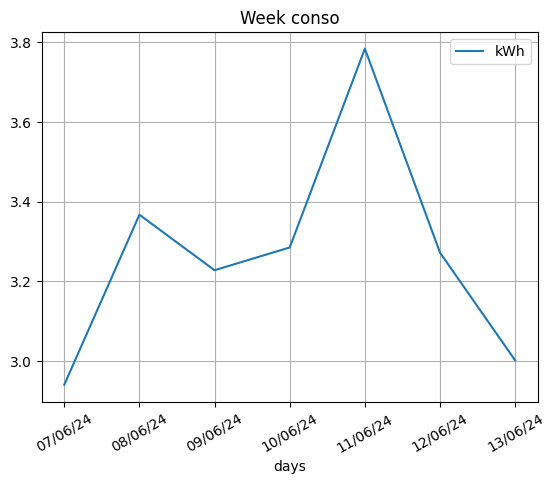

In [1005]:
# last week conso
df_grp.tail(7).plot(grid=True)
plt.title('Week conso')
plt.xticks(rotation=30);

In [1006]:
current=plt.get_current_fig_manager()
current.set_window_title('Conso by day')
#help(current.canvas)
#,facecolor='darkcyan')

<Figure size 640x480 with 0 Axes>

In [1007]:
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
#plt.style.use('dark_background')


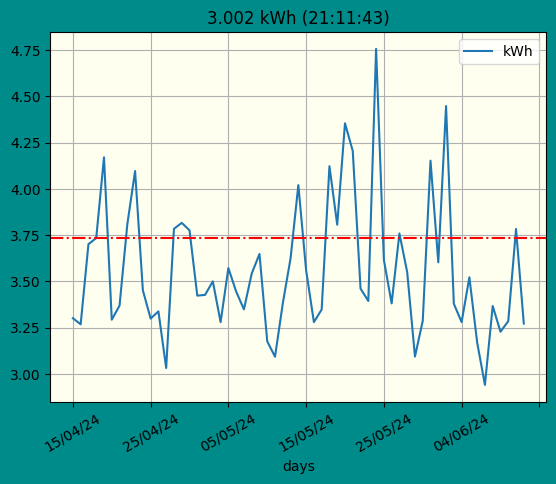

In [1008]:
# pandas plot the day consos in the group
fig, ax = plt.subplots(facecolor='darkcyan')  # as argument
#or fig.patch.set_facecolor('darkcyan') # This changes the grey to white
ax.set_facecolor("ivory")

# 2 last months
df_grp.iloc[-60:-1].plot(grid=True,ax=ax, y=["kWh"])   #df.plot(x="Name", y=["Age", "Height(in cm)"], kind="bar", ax=ax)
plt.title(str(last)+' kWh ('+str(here)+')')
plt.axhline(y=np.nanmean(df_grp),c='red', ls='-.')
plt.xticks(rotation=30);  # https://ipython.readthedocs.io/en/stable/interactive/tips.html


In [1009]:
df_grp.mean()

kWh    3.735795
dtype: float64

In [1010]:
#df_grp.head()
df_grp.tail(7)

,kWh
days,
07/06/24,2.941
08/06/24,3.367
09/06/24,3.228
10/06/24,3.285
11/06/24,3.783
12/06/24,3.272
13/06/24,3.002


In [1011]:
# max min during last month
#print(df_grp.iloc[-31:-1])
df_grp.iloc[-31:-1].describe()


,kWh
count,30.00000
mean,3.61400
std,0.44126
min,2.94100
25%,3.28525
50%,3.49150
75%,3.80025
max,4.75600


In [1012]:
month = df_grp.iloc[-31:-1]['kWh']
print(month.idxmax(), max(month))
print(month.idxmin(), min(month))

24/05/24 4.756
07/06/24 2.941


In [1013]:
day

'13/06/24'

In [1014]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
1110265,20952,0.17,20.952,171.821306,25593691311,2024-06-13 00:00:10.958749,13/06/24,0:0:10
1110266,21032,0.17,21.032,171.167744,25593712343,2024-06-13 00:00:31.990749,13/06/24,0:0:31
1110267,20473,0.17,20.473,175.841352,25593732816,2024-06-13 00:00:52.463749,13/06/24,0:0:52
1110268,21021,0.17,21.021,171.257314,25593753837,2024-06-13 00:01:13.484749,13/06/24,0:1:13
1110269,31552,0.11,31.552,114.097363,25593785389,2024-06-13 00:01:45.036749,13/06/24,0:1:45
...,...,...,...,...,...,...,...,...
1113262,25617,0.14,25.617,140.531678,25669855059,2024-06-13 21:09:34.706749,13/06/24,21:9:34
1113263,25799,0.14,25.799,139.540292,25669880858,2024-06-13 21:10:00.505749,13/06/24,21:10:0
1113264,26138,0.14,26.138,137.730507,25669906996,2024-06-13 21:10:26.643749,13/06/24,21:10:26
1113265,26561,0.14,26.561,135.537066,25669933557,2024-06-13 21:10:53.204749,13/06/24,21:10:53


In [1015]:
#add hours column
conso_hours = conso_day.copy()
conso_hours['hours']= conso_hours['dates'].dt.strftime('%H')
conso_hours.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3002 entries, 1110265 to 1113266
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Interval   3002 non-null   int64         
 1   kWh        3002 non-null   float64       
 2   sec        3002 non-null   float64       
 3   Wh         3002 non-null   float64       
 4   cumul(ms)  3002 non-null   int64         
 5   dates      3002 non-null   datetime64[ns]
 6   days       3002 non-null   object        
 7   heure      3002 non-null   object        
 8   hours      3002 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 234.5+ KB


In [1016]:
# group conso of the day by hour
groupedbyhour = conso_hours[['hours','kWh']].groupby('hours', sort=False)
list(groupedbyhour)

[('00',
          hours   kWh
  1110265    00  0.17
  1110266    00  0.17
  1110267    00  0.17
  1110268    00  0.17
  1110269    00  0.11
  ...       ...   ...
  1110369    00  0.10
  1110370    00  0.10
  1110371    00  0.10
  1110372    00  0.10
  1110373    00  0.10
  
  [109 rows x 2 columns]),
 ('01',
          hours  kWh
  1110374    01  0.1
  1110375    01  0.1
  1110376    01  0.1
  1110377    01  0.1
  1110378    01  0.1
  ...       ...  ...
  1110476    01  0.1
  1110477    01  0.1
  1110478    01  0.1
  1110479    01  0.1
  1110480    01  0.1
  
  [107 rows x 2 columns]),
 ('02',
          hours  kWh
  1110481    02  0.1
  1110482    02  0.1
  1110483    02  0.1
  1110484    02  0.1
  1110485    02  0.1
  ...       ...  ...
  1110580    02  0.1
  1110581    02  0.1
  1110582    02  0.1
  1110583    02  0.1
  1110584    02  0.1
  
  [104 rows x 2 columns]),
 ('03',
          hours   kWh
  1110585    03  0.10
  1110586    03  0.10
  1110587    03  0.11
  1110588    03  0.10


In [1017]:
groupedbyhour.count()

,kWh
hours,
00,109
01,107
02,104
03,106
04,106
05,163
06,149
07,126
08,100


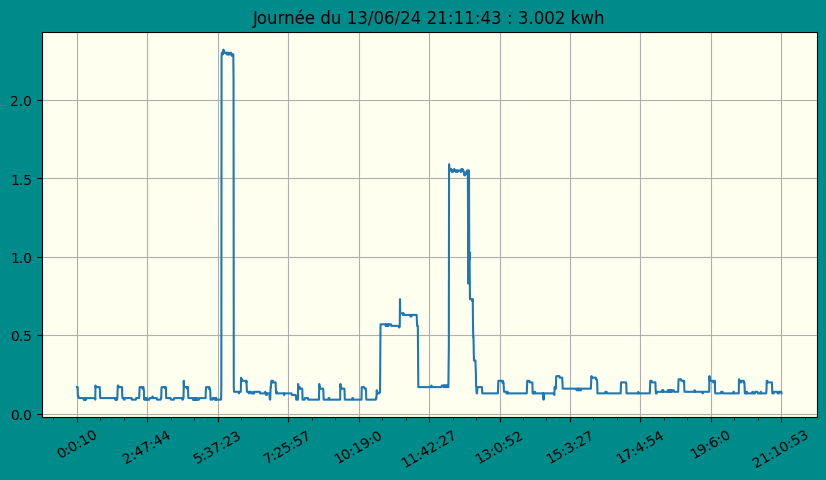

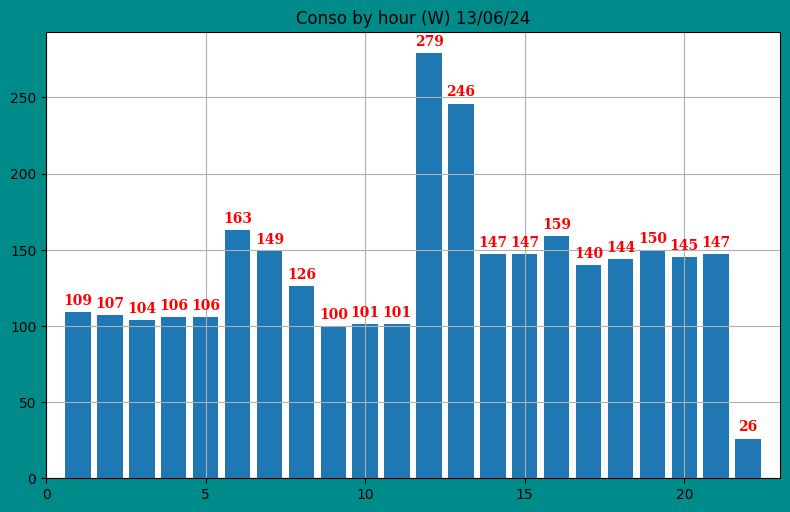

In [1018]:
show(day,bgcolor='ivory')
data = groupedbyhour.count().kWh
#len(groupedbyhour)
x = np.arange(1,len(groupedbyhour)+1)
ymax = max(data)+5
#groupedbyhour.count().plot(grid=True,xticks=x)
fig, ax = plt.subplots(figsize=(8, 5), facecolor='darkcyan')

plt.bar(x,data)
plt.grid()
plt.tight_layout()
plt.title(f'Conso by hour (W) {day}')
plt.xlim(0,len(x)+1)
#plt.xticks(rotation=30);
#plt.ylim(0,ymax)

rects = ax.patches

# Make some labels.
labels = [f"{i}" for i in data]
fontfamily = {'calibri', 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 3, label, ha="center", va="bottom",
        fontfamily=fontfamily, fontsize=10, fontweight='bold', color='red'
    )


In [1019]:
import os
os.listdir(path='.')

['.git',
 '.ipynb_checkpoints',
 '5_days_meteo.ipynb',
 '8days.json',
 '8days.pkl',
 'advanced_expression.ipynb',
 'alphabeta_tree.ipynb',
 'amlich.ipynb',
 'amlich5.ipynb',
 'amlich_data.py',
 'amlich_functions.py',
 'amlich_lib.py',
 'AntPath.ipynb',
 'Apple.csv',
 'astronomie_def.ipynb',
 'atom_electronic_configuration.ipynb',
 'bar_label.ipynb',
 'bell_curve.ipynb',
 'bitcoin_api.ipynb',
 'bitmap_convert.ipynb',
 'bitmap_structure.ipynb',
 'CAC40.csv',
 'chess_board.ipynb',
 'coindesk_api_client.ipynb',
 'collections.ipynb',
 'colormaps.ipynb',
 'conso.txt',
 'conso_by_hour.ipynb',
 'conso_data.csv',
 'conso_jour.csv',
 'conso_jour.png',
 'conso_kwh.ipynb',
 'conso_kwh_reduced.ipynb',
 'conso_par_jour.csv',
 'covid19_france.ipynb',
 'cryptography_fernet.ipynb',
 'csv_readwrite.ipynb',
 'curves.ipynb',
 'dash_app001.ipynb',
 'data_correlation.ipynb',
 'data_temp16122022.csv',
 'dateformatter.ipynb',
 'date_formatter_pandas.ipynb',
 'decimals_pi_plot.ipynb',
 'decorator_kwargs_change

In [1020]:
# list to store files
res = []
# Iterate directory
for file in os.listdir('.'):
    # check only text files
    if file.endswith('.csv'):
        res.append(file)
        print(file)
#print(res)

Apple.csv
CAC40.csv
conso_data.csv
conso_jour.csv
conso_par_jour.csv
data_temp16122022.csv
demain.csv
df.csv
df_grp.csv
DowJones.csv
EURUSD.csv
Ford.csv
karaoke.csv
ligue1_2020_27.csv
Nasdaq.csv
Nikkei.csv
planete.csv
saturn_bodies.csv
saturn_rings.csv
SMSSpamCollection.csv
table-indicateurs-open-data-dep-2023-06-30-17h59.csv
table-indicateurs-open-data-france-2023-06-30-17h59.csv
temp_humidity.csv
Tesla.csv
titanic.csv
Toyota.csv
VNDUSD.csv
WA_Fn-UseC_-Telco-Customer-Churn.csv
week.csv


In [1021]:
#conso_byhour(day)

In [1022]:
# save to file
import pickle
path = r'../consobyhour.pkl'
with open(path,'wb') as file:
    pickle.dump(data, file)

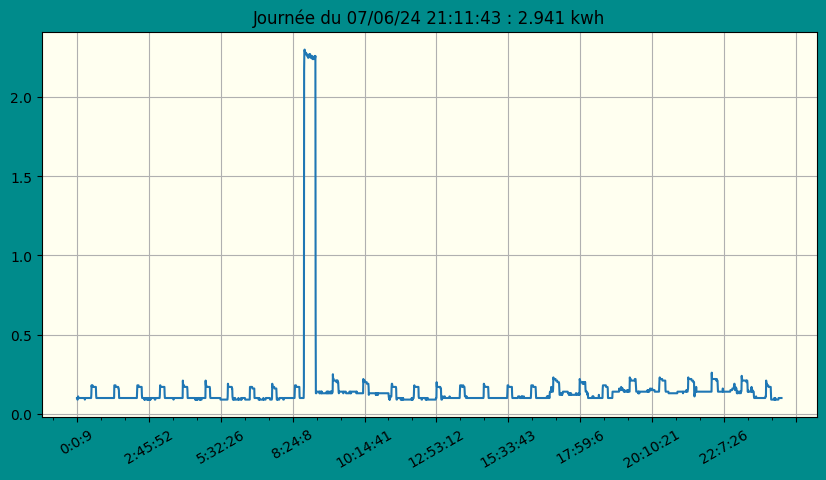

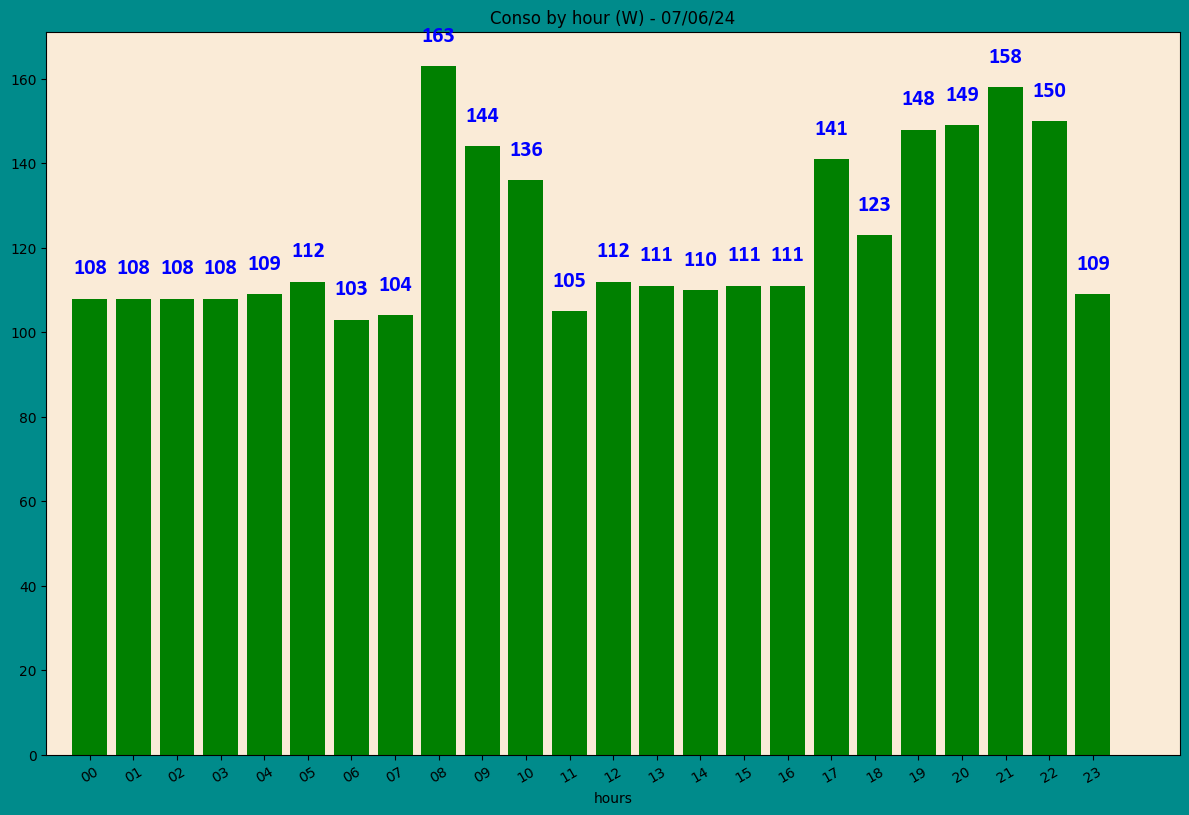

In [1023]:
# plot any day
day = '07/06/24'
show(day,pltcolor='darkcyan')
conso_byhour(day)

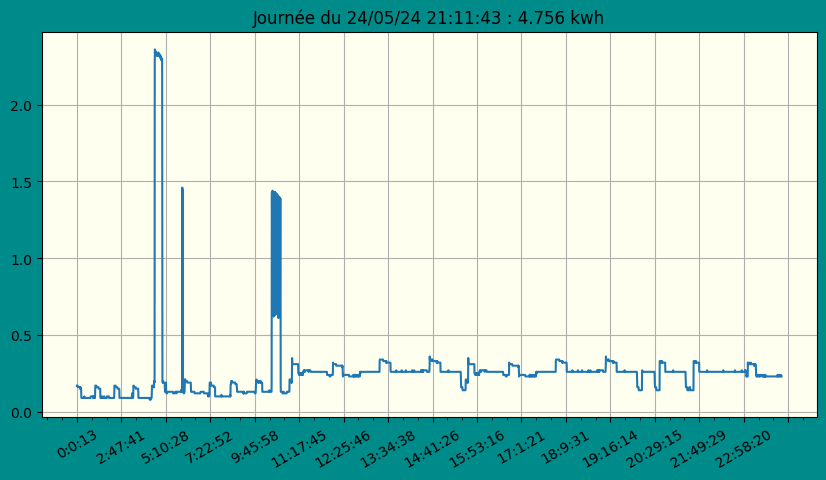

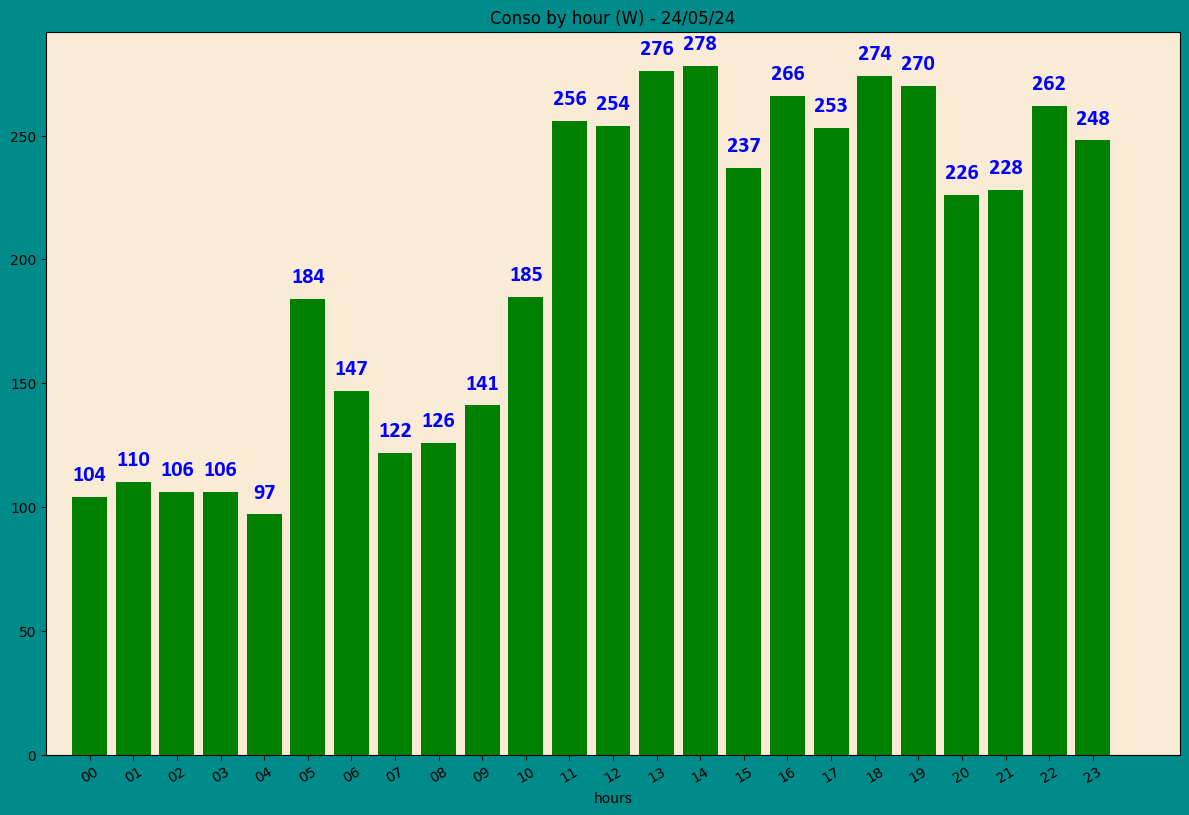

In [1024]:
# plot day max conso (télévision de 11h à 23h)
day = month.idxmax()
show(day,pltcolor='darkcyan')
conso_byhour(day)

In [1025]:
filename='conso_data.csv'
conso_data.to_csv(filename)